# Projeto 2 - ?

Alunos:

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952

---

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('colorblind')  # definicao da paleta de cores

colorsType = {
    'Bug': [.651, .725, .102, 1.],
    'Dark': [.439, .341, .275, 1.],
    'Dragon': [.435, .208, .988, 1.],
    'Electric': [.969, .816, .173, 1.],
    'Fairy': [.839, .522, .678, 1.],
    'Fighting': [.761, .180, .157, 1.],
    'Fire': [.933, .506, .188, 1.],
    'Flying': [.663, .561, .953, 1.],
    'Ghost': [.451, .341, .592, 1.],
    'Grass': [.478, .780, .298, 1.],
    'Ground': [.886, .749, .396, 1.],
    'Ice': [.588, .851, .839, 1.],
    'Normal': [.659, .655, .478, 1.],
    'Poison': [.639, .243, .631, 1.],
    'Psychic': [.976, .333, .529, 1.],
    'Rock': [.714, .631, .212, 1.],
    'Steel': [.718, .718, .808, 1.],
    'Water': [.388, .565, .941, 1.]
}

dfPokemon = pd.read_csv(
    "dfPokemon.csv",
    dtype={
        'cod': str,
        'generation': np.int32,
        'height_m': np.float64,
        'weight_kg': np.float64,
        'total': np.int32,
        'hp': np.int32,
        'attack': np.int32,
        'defense': np.int32,
        'spatk': np.int32,
        'spdef': np.int32,
        'speed': np.int32},
    na_values='')

dfPokemon.sample(5)

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
427,361,Snorunt,3,Normal,Snow Hat Pokémon,NaN,Ice,NaN,0.7,16.8,300,50,50,50,50,50,50,https://img.pokemondb.net/sprites/home/normal/...
511,431,Glameow,4,Normal,Catty Pokémon,NaN,Normal,NaN,0.5,3.9,310,49,55,42,42,37,85,https://img.pokemondb.net/sprites/home/normal/...
638,546,Cottonee,5,Normal,Cotton Puff Pokémon,NaN,Grass,Fairy,0.3,0.6,280,40,27,60,37,50,66,https://img.pokemondb.net/sprites/home/normal/...
235,194,Wooper,2,Normal,Water Fish Pokémon,NaN,Water,Ground,0.4,8.5,210,55,45,45,25,25,15,https://img.pokemondb.net/sprites/home/normal/...
522,442,Spiritomb,4,Normal,Forbidden Pokémon,NaN,Ghost,Dark,1.0,108.0,485,50,92,108,92,108,35,https://img.pokemondb.net/sprites/home/normal/...


generation
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

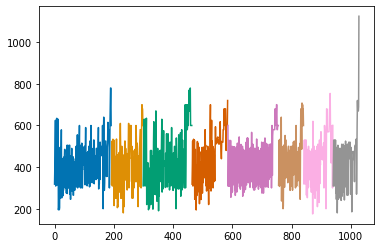

In [2]:
dfPokemon.groupby("generation")["total"].plot()

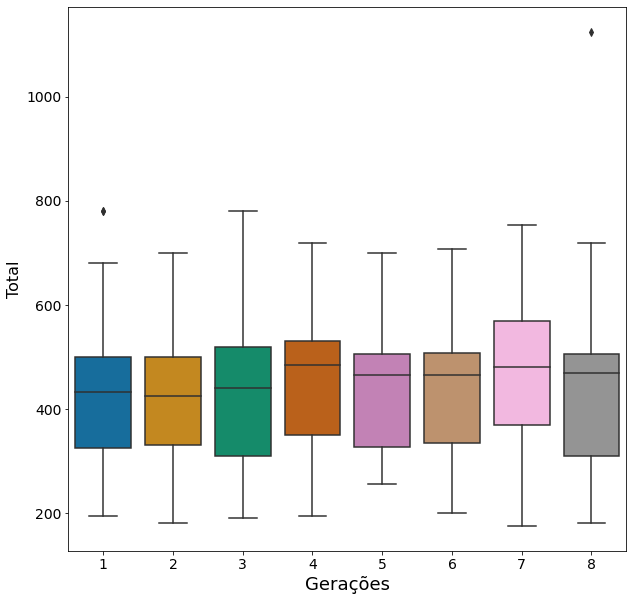

In [3]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="generation", y="total", data=dfPokemon)
plt.xlabel('Gerações', fontsize=18)
plt.ylabel('Total', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

array([[<AxesSubplot:title={'center':'generation'}>,
        <AxesSubplot:title={'center':'height_m'}>,
        <AxesSubplot:title={'center':'weight_kg'}>],
       [<AxesSubplot:title={'center':'total'}>,
        <AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>],
       [<AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'spatk'}>,
        <AxesSubplot:title={'center':'spdef'}>],
       [<AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

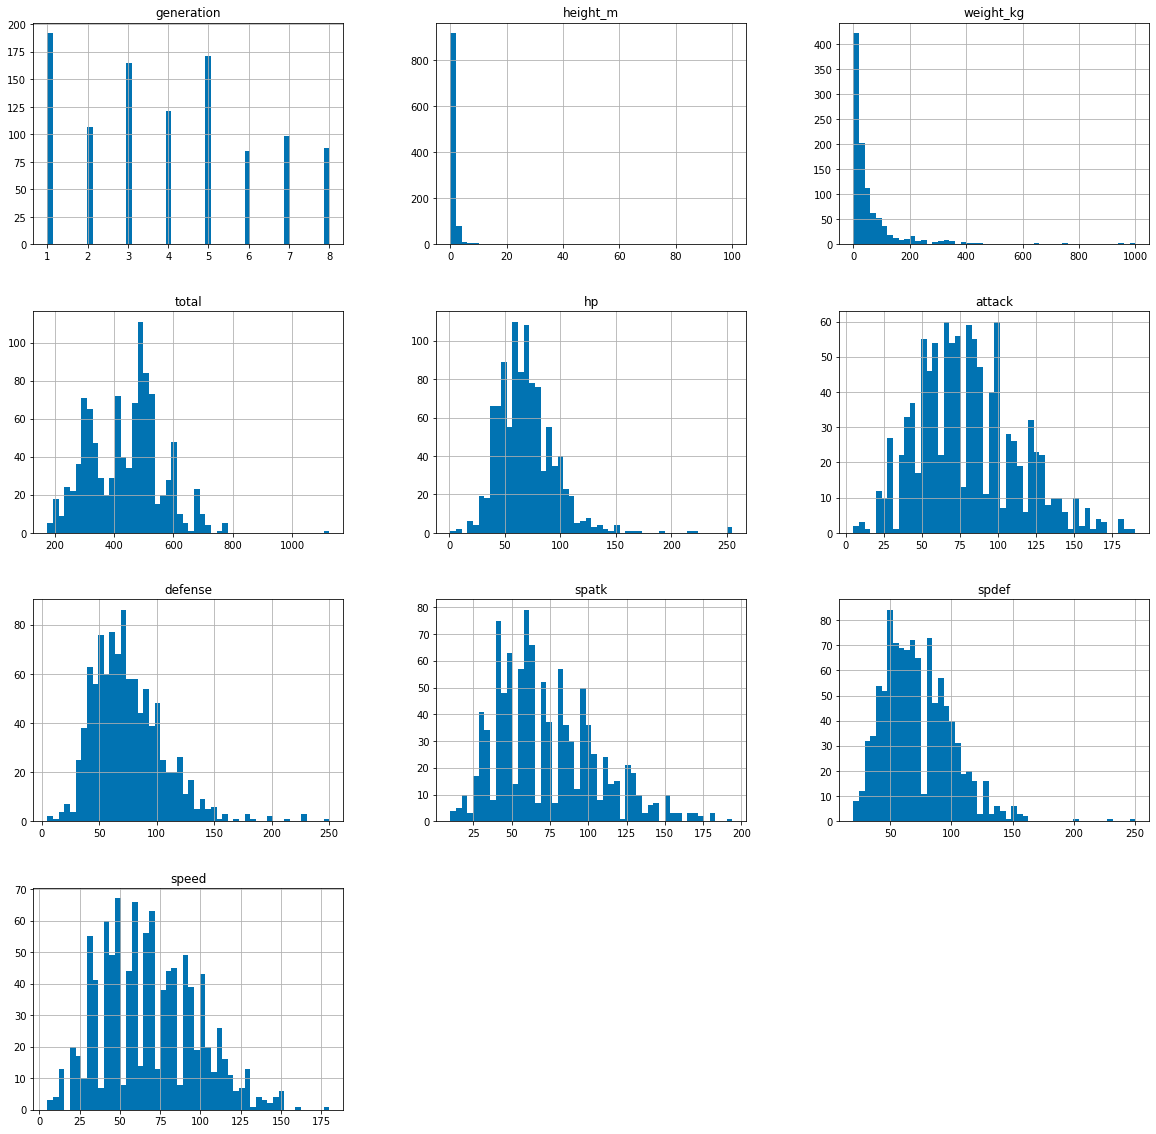

In [4]:
dfPokemon.hist(bins=50, figsize=(20, 20))

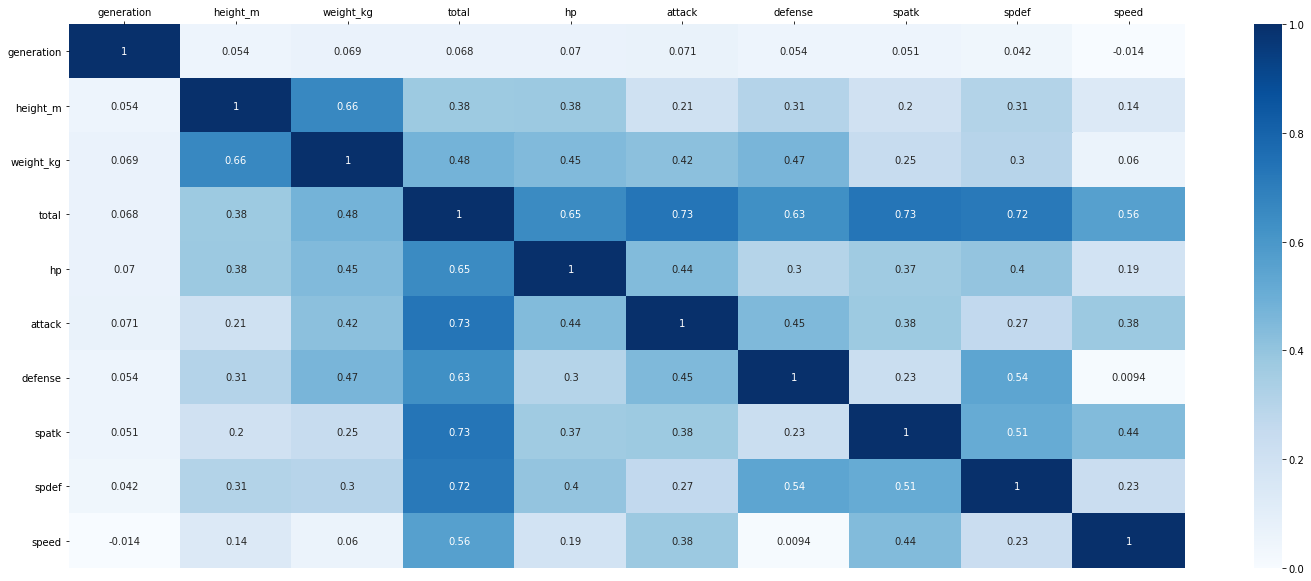

In [5]:
corrmat = dfPokemon.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corrmat, vmax=1., vmin=0,
            annot=True, cmap='Blues').xaxis.tick_top()

<Figure size 1440x1440 with 0 Axes>

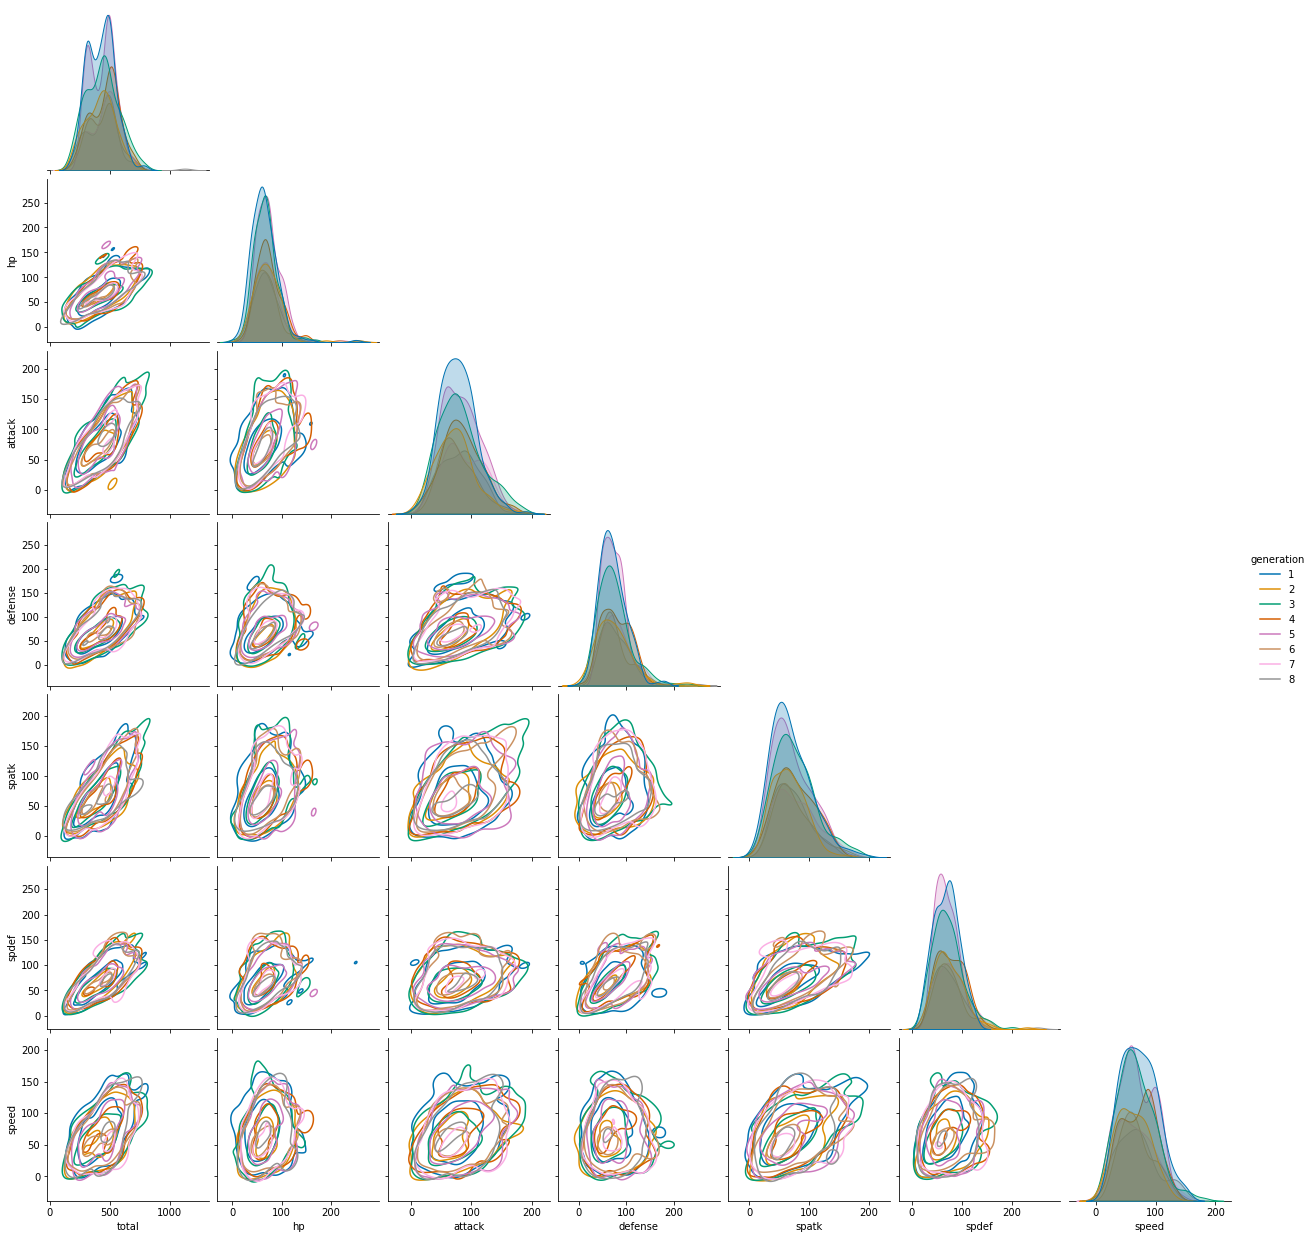

In [6]:
plt.figure(figsize=(20, 20))
# sns.pairplot(dfPokemon.loc[dfPokemon.loc[:, 'generation'] == 2, :],
sns.pairplot(dfPokemon,
             vars=['total',
                   'hp',
                   'attack',
                   'defense',
                   'spatk',
                   'spdef',
                   'speed'],
             hue='generation',
             palette='colorblind',
             kind='kde',
             corner=True,
             plot_kws={'levels': 3})  # 'fill': True,'alpha': .2

<BarContainer object of 18 artists>

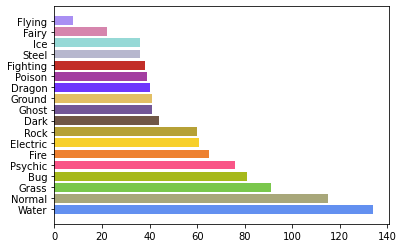

In [7]:
countTypes = dfPokemon.loc[:, ('type1')].value_counts()
plt.barh(y=countTypes.keys(), width=countTypes.values, color=countTypes.keys().map(colorsType))